In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
# 0. Init
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN

#read data in
data = pd.read_csv('movieReplicationSet.csv')
#print(data.columns)
print(data.shape)
data.head()

(1097, 477)


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [3]:
list1 = [] 
word = "yen"
for i in word :
    list1.append(i)
print(list1)

['y', 'e', 'n']


In [4]:
word = "yen"
for i in word :
    list1 = [] 
    list1.append(i)
print(list1)


['n']


In [2]:
#Loading data :
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape

(1097, 477)

Q1: Relationship between sensation seeking and movie experiences? 

In [3]:
#sensationSeek,movieRatings
data1=pd.concat([movieExperience,sensationSeek],axis=1)
data1=data1.dropna()
data1.shape
moviexperience=data1.iloc[0:,0:10]
sensationseeking=data1.iloc[0:,10:30]
moviexperience.shape

(1029, 10)

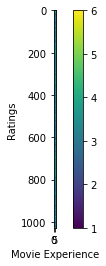

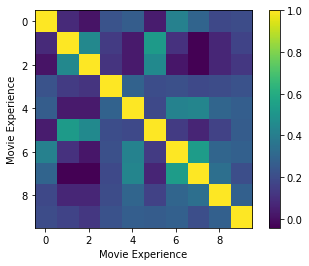

In [4]:
# 2. Looking at the raw data (Exploratory data analysis)
plt.imshow(moviexperience) # Display an image, i.e. data, on a 2D regular raster.
plt.xlabel('Movie Experience')
plt.ylabel('Ratings')
plt.colorbar() # Add color bar 
plt.show() 

#3. Compute correlation matrix
corrMatrix = np.corrcoef(moviexperience,rowvar=False) 
# Plot the data:
plt.imshow(corrMatrix) 
plt.xlabel('Movie Experience')
plt.ylabel('Movie Experience')
plt.colorbar()
plt.show()

In [5]:
# 1. Z-score the data:
zscoredData = stats.zscore(moviexperience)

# 2. Initialize PCA object and fit to our data:
pca = PCA().fit(zscoredData)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_

# 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. Where do the
# principal components point, in terms of the 17 questions?
loadings1 = pca.components_
# 3c. Rotated Data: Simply the transformed data - we had 40 courses (rows) in
# terms of 17 variables (columns), now we have 40 courses in terms of 17
# factors ordered by decreasing eigenvalue
rotatedData1 = pca.fit_transform(zscoredData)
# 4. For the purposes of this, you can think of eigenvalues in terms of 
# (co)variance explained:
covarExplained = eigVals/sum(eigVals)*100

# Now let's display this for each factor:
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))
    
#Our first PC alone explain 29% of the variance and it drops down 

29.481
18.776
8.761
8.488
7.666
6.978
5.751
5.551
4.402
4.146


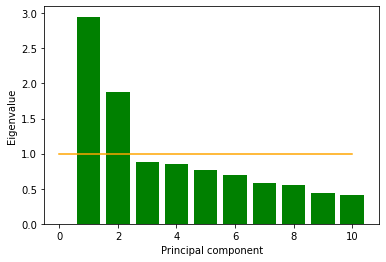

In [6]:
#Plot Screeplot 
numQuestion = 10
x = np.linspace(1,numQuestion,numQuestion)
plt.bar(x, eigVals, color='green')
plt.plot([0,numQuestion],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()
#the index starts from 0 but nxn so it's 1 
#in loadings matrix index is 0.

In [7]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

Number of factors selected by Kaiser criterion: 2


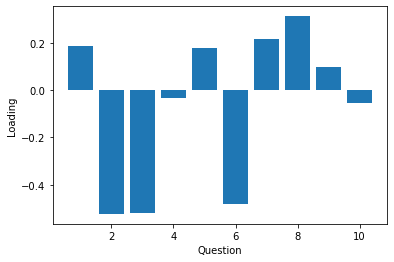

Index(['I have cried during a movie',
       'I have trouble following the story of a movie',
       'I have trouble remembering the story of a movie a couple of days after seeing it',
       'When watching a movie I cheer or shout or talk or curse at the screen',
       'When watching a movie I feel like the things on the screen are happening to me',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'When watching a movie I get completely immersed in the alternative reality of the film',
       'Movies change my position on social economic or political issues',
       'When watching movies things get so intense that I have to stop watching'],
      dtype='object')


In [8]:
# 7. Interpreting the factors 

# Now that we realize that 1, 2 are reasonable solutions to the course
# evaluation issue, we have to interpret the factors.
# This is perhaps where researchers have the most leeway.
# You do this - in principle - by looking at the loadings.
# In which direction does the factor point? 

whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings1[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot
print(moviexperience.columns) # Display questions

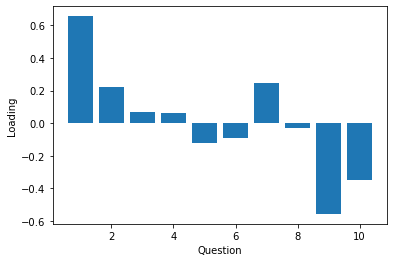

Index(['I have cried during a movie',
       'I have trouble following the story of a movie',
       'I have trouble remembering the story of a movie a couple of days after seeing it',
       'When watching a movie I cheer or shout or talk or curse at the screen',
       'When watching a movie I feel like the things on the screen are happening to me',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'When watching a movie I get completely immersed in the alternative reality of the film',
       'Movies change my position on social economic or political issues',
       'When watching movies things get so intense that I have to stop watching'],
      dtype='object')


In [9]:
whichPrincipalComponent = 2 # Select and look at once factor at a time 
plt.bar(x,loadings1[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot
print(moviexperience.columns) # Display questions

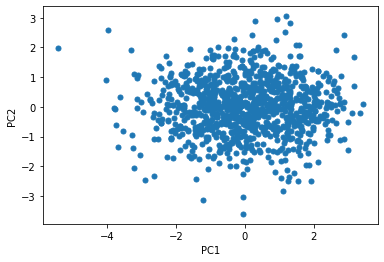

In [10]:
# 8. Visualize our data in the new coordinate system

plt.plot(rotatedData1[:,1]*-1,rotatedData1[:,2]*-1,'o',markersize=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Doing PCA for SensationSeeking 

In [11]:
sensationseeking=data1.iloc[0:,10:30]
sensationseeking.shape

(1029, 20)

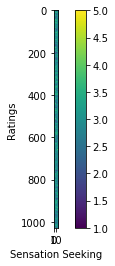

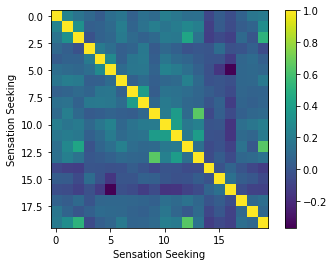

In [12]:
# 2. Looking at the raw data (Exploratory data analysis)
plt.imshow(sensationseeking) # Display an image, i.e. data, on a 2D regular raster.
plt.xlabel('Sensation Seeking')
plt.ylabel('Ratings')
plt.colorbar() # Add color bar 
plt.show() 

#3. Compute correlation matrix
corrMatrix = np.corrcoef(sensationseeking,rowvar=False) 
# Plot the data:
plt.imshow(corrMatrix) 
plt.xlabel('Sensation Seeking')
plt.ylabel('Sensation Seeking')
plt.colorbar()
plt.show()

In [13]:
# 1. Z-score the data:
zscoredData = stats.zscore(sensationseeking)

# 2. Initialize PCA object and fit to our data:
pca = PCA().fit(zscoredData)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_

# 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. Where do the
# principal components point, in terms of the 17 questions?
loadings = pca.components_
# 3c. Rotated Data: Simply the transformed data - we had 40 courses (rows) in
# terms of 17 variables (columns), now we have 40 courses in terms of 17
# factors ordered by decreasing eigenvalue
rotatedData = pca.fit_transform(zscoredData)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# (co)variance explained:
covarExplained = eigVals/sum(eigVals)*100

# Now let's display this for each factor:
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))
    
#Our first PC alone explain 29% of the variance and it drops down 

17.45
8.887
8.191
6.537
5.787
5.218
4.927
4.817
4.494
4.288
3.976
3.729
3.702
3.356
3.074
2.945
2.779
2.503
1.718
1.621


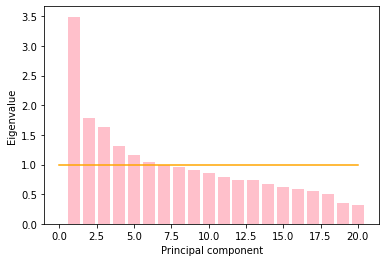

In [14]:
#Plot Screeplot 
numQuestion = 20
x = np.linspace(1,numQuestion,numQuestion)
plt.bar(x, eigVals, color='pink')
plt.plot([0,numQuestion],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [15]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))
print(np.where(max(eigVals)))

Number of factors selected by Kaiser criterion: 6
(array([0]),)


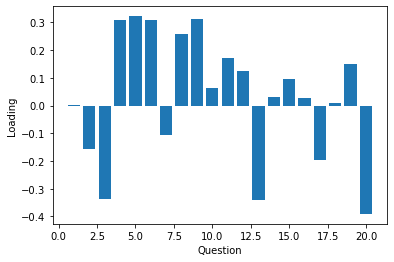

Index(['I enjoy driving fast', 'I enjoy rollercoasters ',
       'Have you ever bungee-jumped?', 'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?'],
      dtype='object')


In [16]:
# 7. Interpreting the factors 

# Now that we realize that 1, 2 are reasonable solutions to the course
# evaluation issue, we have to interpret the factors.
# This is perhaps where researchers have the most leeway.
# You do this - in principle - by looking at the loadings.
# In which direction does the factor point? 

whichPrincipalComponent = 1 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot
print(sensationseeking.columns) # Display questions

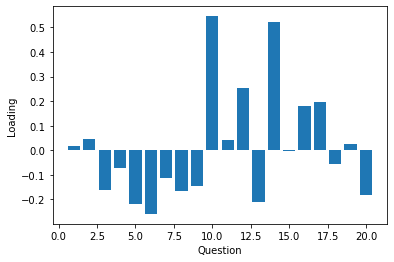

In [17]:
whichPrincipalComponent = 2# Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

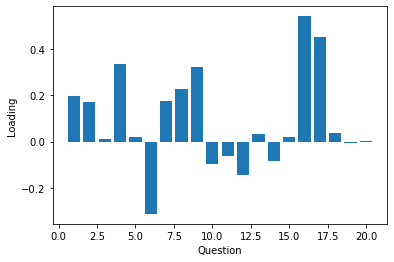

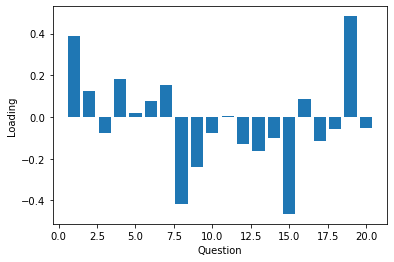

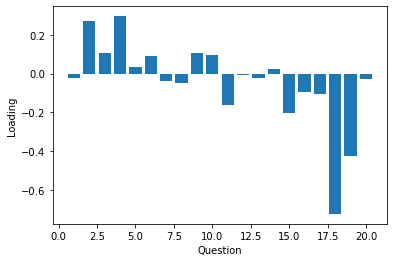

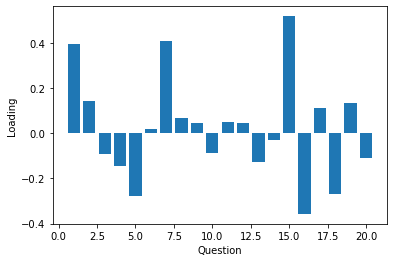

In [18]:
whichPrincipalComponent = 3# Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

whichPrincipalComponent = 4# Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot


whichPrincipalComponent = 5# Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

whichPrincipalComponent = 6# Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot



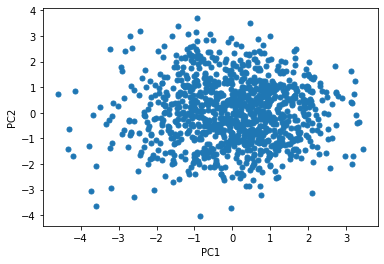

In [19]:
# 8. Visualize our data in the new coordinate system
plt.plot(rotatedData[:,1]*-1,rotatedData[:,2]*-1,'o',markersize=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [20]:
print(rotatedData.shape)
a=np.corrcoef(rotatedData1[:,0],rotatedData[:,0])
print(a[0][1])

(1029, 20)
0.012481716681392155


QUESTION 2 : Is there evidence of personality types based on the data of these research participants? If so,characterize these types both quantitatively and narratively.
Use clustering to find personality type. 

In [21]:
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape

personality=data.iloc[0:,420:464]
personality=personality.dropna()
print(personality.head())
print(personality.columns)
#there are 44 columns in this 

   Is talkative  Tends to find fault with others  Does a thorough job  \
1           2.0                              3.0                  4.0   
2           4.0                              2.0                  4.0   
3           5.0                              3.0                  5.0   
4           4.0                              4.0                  4.0   
5           1.0                              3.0                  3.0   

   Is depressed/Blue  Is original/comes up with new ideas  Is reserved  \
1                1.0                                  3.0          5.0   
2                2.0                                  3.0          3.0   
3                4.0                                  5.0          3.0   
4                4.0                                  2.0          3.0   
5                4.0                                  3.0          4.0   

   Is helpful and unselfish with others  Can be somewhat careless  \
1                                   3.0        

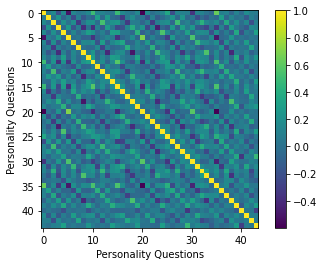

In [22]:
# 4. To ascertain whether a PCA is indicated, let's look at the correlation heatmap
corrMatrixq2 = np.corrcoef(personality,rowvar=False)
plt.imshow(corrMatrixq2)
plt.xlabel('Personality Questions')
plt.ylabel('Personality Questions')
plt.colorbar()
plt.show()

In [23]:
# 5. PCA is indicated, and we have an expectation of the results. So let's do a PCA.

# Z-score the data:
zscoredData = stats.zscore(personality)

# Initialize PCA object and fit to our data:
pca = PCA().fit(zscoredData)

# Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_

# Loadings (eigenvectors): Weights per factor in terms of the original data.
loadings = pca.components_*-1

# Rotated Data - simply the transformed data:
origDataNewCoordinates = pca.fit_transform(zscoredData)*-1

for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))


17.45
8.887
8.191
6.537
5.787
5.218
4.927
4.817
4.494
4.288
3.976
3.729
3.702
3.356
3.074
2.945
2.779
2.503
1.718
1.621


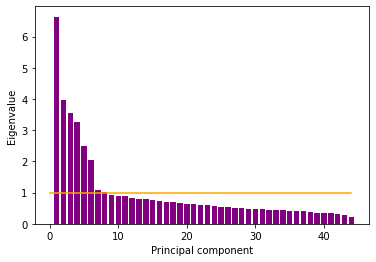

In [24]:
#Screeplot
numQuestion = 44
x = np.linspace(1,numQuestion,numQuestion)
plt.bar(x, eigVals, color='purple')
plt.plot([0,numQuestion],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [25]:
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

Number of factors selected by Kaiser criterion: 8


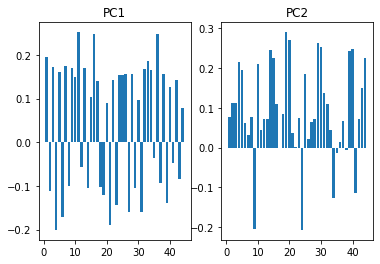

Text(0.5, 1.0, 'PC4')

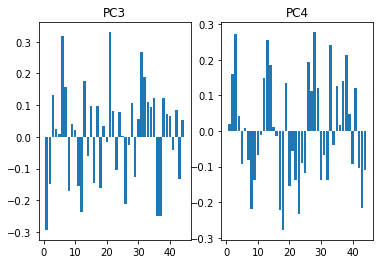

In [26]:
# Looking at the corrected scree plot, we get 5 factors, both by 
# Kaiser criterion and Elbow.

# Next step: Look at the loadings to figure out meaning:
plt.subplot(1,2,1) # Factor 1: 
plt.bar(np.linspace(1,numQuestion,numQuestion),loadings[0,:]) # "Turmoil" #0th columns of loading which is pc1 
plt.title('PC1')
plt.subplot(1,2,2) # Factor 2:
plt.bar(np.linspace(1,numQuestion,numQuestion),loadings[1,:]) # "Support"
plt.title('PC2')
plt.show()
plt.subplot(1,2,1) # Factor 1: 
plt.bar(np.linspace(1,numQuestion,numQuestion),loadings[2,:]) # "Turmoil" #0th columns of loading which is pc1 
plt.title('PC3')
plt.subplot(1,2,2) # Factor 1: 
plt.bar(np.linspace(1,numQuestion,numQuestion),loadings[3,:]) # "Turmoil" #0th columns of loading which is pc1 
plt.title('PC4')



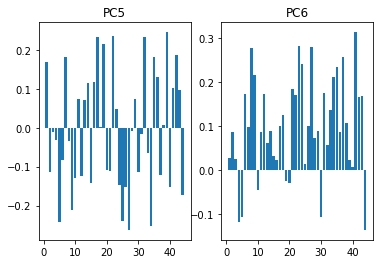

Text(0.5, 1.0, 'PC8')

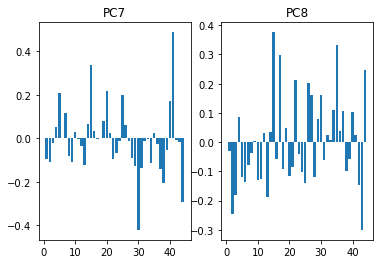

In [27]:
# Next step: Look at the loadings to figure out meaning:
plt.subplot(1,2,1) # Factor 1: 
plt.bar(np.linspace(1,numQuestion,numQuestion),loadings[4,:]) # "Turmoil" #0th columns of loading which is pc1 
plt.title('PC5')
plt.subplot(1,2,2) # Factor 2:
plt.bar(np.linspace(1,numQuestion,numQuestion),loadings[5,:]) # "Support"
plt.title('PC6')
plt.show()
plt.subplot(1,2,1) # Factor 1: 
plt.bar(np.linspace(1,numQuestion,numQuestion),loadings[6,:]) # "Turmoil" #0th columns of loading which is pc1 
plt.title('PC7')
plt.subplot(1,2,2) # Factor 1: 
plt.bar(np.linspace(1,numQuestion,numQuestion),loadings[7,:]) # "Turmoil" #0th columns of loading which is pc1 
plt.title('PC8')


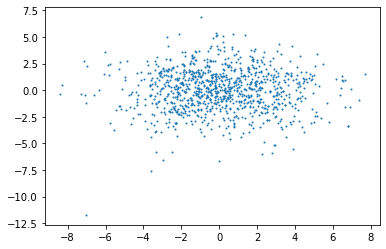

In [28]:
# 6. Visualize our data in the new coordinate system:
plt.plot(origDataNewCoordinates[:,0],origDataNewCoordinates[:,1],'o',markersize=1)
plt.show()

In [29]:
print(personality.columns) # Display questions

Index(['Is talkative', 'Tends to find fault with others',
       'Does a thorough job', 'Is depressed/Blue',
       'Is original/comes up with new ideas', 'Is reserved',
       'Is helpful and unselfish with others', 'Can be somewhat careless',
       'Is relaxed/handles stress well',
       'Is curious about many different things', 'Is full of energy',
       'Starts quarrels with others', 'Is a reliable worker', 'Can be tense',
       'Is ingenious/a deep thinker', 'Generates a lot of Enthusiasm',
       'Has a forgiving nature', 'Tends to be disorganized', 'Worries a lot',
       'Has an active imagination', 'Tends to be quiet',
       'Is generally trusting', 'Tends to be lazy',
       'Is emotionally stable/not easily upset', 'is inventive',
       'Has an assertive personality', 'Can be cold and aloof',
       'Perseveres until the task is finished', 'Can be moody',
       'Values artistic/aesthetic experiences', 'Is sometimes shy/inhibited',
       'Is considerate and kind to al

In [30]:
x = np.column_stack((origDataNewCoordinates[:,0],origDataNewCoordinates[:,1],origDataNewCoordinates[:,2],origDataNewCoordinates[:,3],origDataNewCoordinates[:,4],origDataNewCoordinates[:,5],origDataNewCoordinates[:,6],origDataNewCoordinates[:,7]))

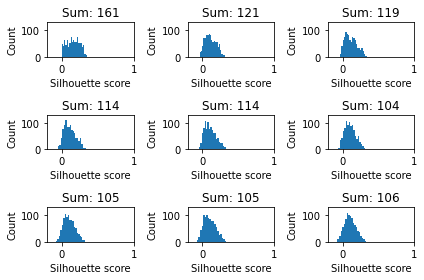

In [31]:
# Silhouette: How similar to points in cluster vs. others, arbitrariness

# Remember: each data point gets its own silhouette coefficient ranging 
# from 0 (arbitrary classification) to 1 (ideal classification).

# Init:
numClusters = 9 # how many clusters are we looping over? (from 8 to 17)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(x) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(x,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,130)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

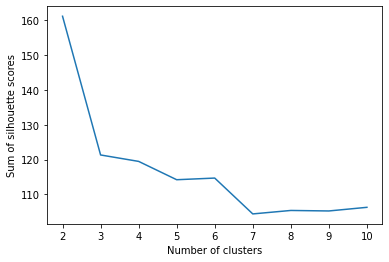

In [32]:
# Plot this to make it clearer what is going on
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()

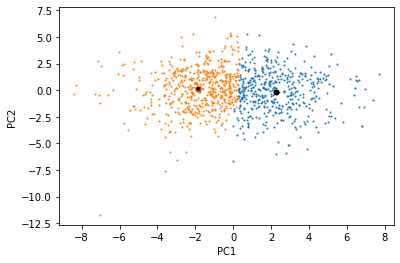

In [33]:
# Now let's recompute the kMeans using  clusters and plot the color-coded data

# Recompute kMeans:
numClusters = 2
kMeans = KMeans(n_clusters = numClusters).fit(x) 
cId = kMeans.labels_ 
cCoords = kMeans.cluster_centers_ 

# Plot the color-coded data:
for ii in range(numClusters):
    plotIndex = np.argwhere(cId == int(ii))
    plt.plot(x[plotIndex,0],x[plotIndex,1],'o',markersize=1)
    plt.plot(cCoords[int(ii-1),0],cCoords[int(ii-1),1],'o',markersize=5,color='black')  
    plt.xlabel('PC1')
    plt.ylabel('PC2')


Question 3: Are movies that are more popular rated higher than movies that are less popular?

In [34]:
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape

movieRatings=data.iloc[0:,0:400]
movieRatings.shape

(1097, 400)

In [35]:
numRatings=movieRatings.count(axis=0)
numRatingsmedian=numRatings.median(axis=0)
popMovies=numRatings.loc[numRatings>=numRatingsmedian]
unpopMovies=numRatings.loc[numRatings<numRatingsmedian]
print(popMovies)
print(unpopMovies.shape)

Django Unchained (2012)                           453
Alien (1979)                                      289
Indiana Jones and the Last Crusade (1989)         463
Fargo (1996)                                      254
Black Swan (2010)                                 588
                                                 ... 
X-Men 2 (2003)                                    448
The Mask (1994)                                   398
Jaws (1975)                                       496
Harry Potter and the Chamber of Secrets (2002)    846
Anaconda (1997)                                   198
Length: 200, dtype: int64
(200,)


In [36]:
popMovieslist=popMovies.axes[0].tolist()
unpopMovieslist=unpopMovies.axes[0].tolist()

popMovies=movieRatings.loc[:,popMovieslist]
unpopMovies=movieRatings.loc[:,unpopMovieslist]
print(popMovies)
print(unpopMovies)


      Django Unchained (2012)  Alien (1979)  \
0                         4.0           NaN   
1                         1.5           NaN   
2                         NaN           NaN   
3                         2.0           NaN   
4                         3.5           NaN   
...                       ...           ...   
1092                      NaN           NaN   
1093                      NaN           NaN   
1094                      NaN           NaN   
1095                      NaN           NaN   
1096                      4.0           NaN   

      Indiana Jones and the Last Crusade (1989)  Fargo (1996)  \
0                                           3.0           NaN   
1                                           NaN           NaN   
2                                           NaN           NaN   
3                                           3.0           NaN   
4                                           0.5           1.0   
...                                         .

In [37]:
medianRatingspopind=popMovies.median(axis=0)
medianRatingsallpop=medianRatingspopind.median()
print(medianRatingsallpop)
#medianRatingspop=medianRatingspopind.median()

medianRatingsunpopind=unpopMovies.median(axis=0)
medianRatingsallunpop=medianRatingsunpopind.median()
print(medianRatingsallunpop)

#medianRatingsunpop=medianRatingsunpopind.median()


3.0
2.5


Question4: Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?


In [38]:
# Nonparametric tests equivalent to t-tests - Mann-Whitney U test:
# Test for comparing medians of ordinal data (such as movie ratings)
# from 2 groups
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape


Shrek=movieRatings['Shrek (2001)']
gender=data.iloc[:,474]

combinedData=pd.concat([Shrek,gender],axis=1)
combinedData=combinedData.dropna()



femaleShrek=combinedData.loc[combinedData.iloc[:,1]==1]
maleShrek=combinedData.loc[combinedData.iloc[:,1]==2]

#print(femaleShrek)
#print(maleShrek)

u1,p1 = stats.mannwhitneyu(femaleShrek.iloc[:,0],maleShrek.iloc[:,0])
print(u1,round(p1,6),sep='\n')

96830.5
0.050537


In [39]:
gender=data.iloc[:,474]
gender

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1092    1.0
1093    1.0
1094    1.0
1095    1.0
1096    1.0
Name: Gender identity (1 = female; 2 = male; 3 = self-described), Length: 1097, dtype: float64

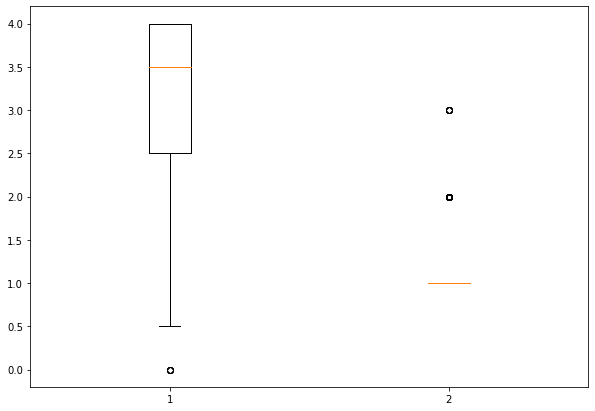

In [40]:
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
data = combinedData
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

Question 5: Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [41]:
# Nonparametric tests equivalent to t-tests - Mann-Whitney U test:
# Test for comparing medians of ordinal data (such as movie ratings)
# from 2 groups
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape

tlk=movieRatings['The Lion King (1994)']
onlyChild=data.iloc[:,475]

combinedData=pd.concat([tlk,onlyChild],axis=1)
combinedData=combinedData.dropna()


OnlyChild=combinedData.loc[combinedData.iloc[:,1]==1]
Siblings=combinedData.loc[combinedData.iloc[:,1]==0]

print(OnlyChild)
print(Siblings)

u1,p1 = stats.mannwhitneyu(OnlyChild.iloc[:,0],Siblings.iloc[:,0])
print(u1,round(p1,6),sep='\n')

      The Lion King (1994)  \
2                      4.0   
4                      4.0   
5                      4.0   
22                     3.5   
33                     3.5   
...                    ...   
1058                   3.0   
1068                   3.5   
1075                   4.0   
1076                   3.5   
1088                   3.0   

      Are you an only child? (1: Yes; 0: No; -1: Did not respond)  
2                                                     1            
4                                                     1            
5                                                     1            
22                                                    1            
33                                                    1            
...                                                 ...            
1058                                                  1            
1068                                                  1            
1075                       

Question 6: Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than
those who prefer to watch them alone?

In [42]:
# Nonparametric tests equivalent to t-tests - Mann-Whitney U test:
# Test for comparing medians of ordinal data (such as movie ratings)
# from 2 groups
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape


wolf=movieRatings['The Wolf of Wall Street (2013)']
socialViewPref=data.iloc[0:,476]

combinedData=pd.concat([wolf,socialViewPref],axis=1)
combinedData=combinedData.dropna()


alone=combinedData.loc[combinedData.iloc[:,1]==1]
socially=combinedData.loc[combinedData.iloc[:,1]==0]

print(alone)
print(socially)

u1,p1 = stats.mannwhitneyu(alone.iloc[:,0],socially.iloc[:,0])
print(u1,round(p1,6),sep='\n')

      The Wolf of Wall Street (2013)  \
3                                4.0   
4                                3.0   
7                                3.5   
8                                3.5   
9                                3.0   
...                              ...   
1078                             3.5   
1080                             4.0   
1086                             3.5   
1090                             4.0   
1096                             4.0   

      Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)  
3                                                     1                   
4                                                     1                   
7                                                     1                   
8                                                     1                   
9                                                     1                   
...                                                 ...              

Question 7:
There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’,
‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this
dataset. How many of these are of inconsistent quality, as experienced by viewers?

In [43]:
#'The Matrix'
data = pd.read_csv('movieReplicationSet.csv')

movieRatings=data.iloc[0:,0:400]
sensationSeek=data.iloc[0:,400:420]
personality=data.iloc[0:,420:464]
movieExperience=data.iloc[0:,464:474]
gender=data.iloc[0:,474]
onlyChild=data.iloc[0:,475]
socialViewPref=data.iloc[0:,476]
data.shape


# 2. Let's get a handle on our movie titles:
titles = movieRatings.columns 
# 3. Find the Matrix data:
title = 'Matrix' # or any other title, for that matter 
theMatrix = movieRatings.loc[:,movieRatings.columns.str.contains(title)] # Access group of rows and columns by label(s)
theMatrix=theMatrix.dropna()
print(theMatrix.shape)
h,p = stats.kruskal(theMatrix.iloc[:,0],theMatrix.iloc[:,1],theMatrix.iloc[:,2])
print(h,round(p,3))


(260, 3)
40.32303905969196 0.0


In [44]:
#'Star Wars'
# 2. Let's get a handle on our movie titles:
titles = movieRatings.columns 
# 3. Find the Matrix data:
title = 'Star Wars' # or any other title, for that matter 
starwar = movieRatings.loc[:,movieRatings.columns.str.contains(title)] # Access group of rows and columns by label(s)
starwar=starwar.dropna()
print(starwar.shape)
h,p = stats.kruskal(starwar.iloc[:,0],starwar.iloc[:,1],starwar.iloc[:,2])
print(h,round(p,3))

(333, 6)
108.36408764120078 0.0


In [45]:
#'Harry Potter'
# 2. Let's get a handle on our movie titles:
titles = movieRatings.columns 
# 3. Find the Matrix data:
title = 'Harry Potter' # or any other title, for that matter 
harrporter = movieRatings.loc[:,movieRatings.columns.str.contains(title)] # Access group of rows and columns by label(s)
harrporter=harrporter.dropna()
print(harrporter.shape)
htm,ptm = stats.kruskal(harrporter.iloc[:,0],harrporter.iloc[:,1],harrporter.iloc[:,2])
print(htm,round(ptm,3))

(710, 4)
4.354824407279647 0.113


In [46]:
### 'Indiana Jones'
# 2. Let's get a handle on our movie titles:
titles = movieRatings.columns 
# 3. Find the Matrix data:
title = 'Indiana Jones' # or any other title, for that matter 
indianajones = movieRatings.loc[:,movieRatings.columns.str.contains(title)] # Access group of rows and columns by label(s)
indianajones=indianajones.dropna()
print(indianajones.shape)
htm,ptm = stats.kruskal(indianajones.iloc[:,0],indianajones.iloc[:,1],indianajones.iloc[:,2])
print(htm,round(ptm,3))

(244, 4)
11.449007590447605 0.003


In [47]:
#'Jurassic Park'
# 2. Let's get a handle on our movie titles:
titles = movieRatings.columns 
# 3. Find the Matrix data:
title = 'Jurassic Park' # or any other title, for that matter 
jurassicpark = movieRatings.loc[:,movieRatings.columns.str.contains(title)] # Access group of rows and columns by label(s)
jurassicpark=jurassicpark.dropna()
print(jurassicpark.shape)
htm,ptm = stats.kruskal(jurassicpark.iloc[:,0],jurassicpark.iloc[:,1],jurassicpark.iloc[:,2])
print(htm,round(ptm,3))

(398, 3)
49.42733030275783 0.0


In [48]:
#'Pirates of the Caribbean'
# 2. Let's get a handle on our movie titles:
titles = movieRatings.columns 
# 3. Find the Matrix data:
title = 'Pirates of the Caribbean' # or any other title, for that matter 
poc = movieRatings.loc[:,movieRatings.columns.str.contains(title)] # Access group of rows and columns by label(s)
poc=poc.dropna()
print(poc.shape)
htm,ptm = stats.kruskal(poc.iloc[:,0],poc.iloc[:,1],poc.iloc[:,2])
print(htm,round(ptm,3))

(561, 3)
6.660021086485515 0.036


In [49]:
#'Toy Story'
# 2. Let's get a handle on our movie titles:
titles = movieRatings.columns 
# 3. Find the Matrix data:
title = 'Toy Story' # or any other title, for that matter 
toystory = movieRatings.loc[:,movieRatings.columns.str.contains(title)] # Access group of rows and columns by label(s)
toystory=toystory.dropna()
print(toystory.shape)
htm,ptm = stats.kruskal(toystory.iloc[:,0],toystory.iloc[:,1],toystory.iloc[:,2])
print(htm,round(ptm,3))

(757, 3)
23.496729938969775 0.0


In [50]:
#'Batman'
# 2. Let's get a handle on our movie titles:
titles = movieRatings.columns 
# 3. Find the Matrix data:
title = 'Batman' # or any other title, for that matter 
batman = movieRatings.loc[:,movieRatings.columns.str.contains(title)] # Access group of rows and columns by label(s)
batman=theMatrix.dropna()
print(batman.shape)
htm,ptm = stats.kruskal(batman.iloc[:,0],batman.iloc[:,1],batman.iloc[:,2])
print(htm,round(ptm,3))

(260, 3)
40.32303905969196 0.0
